In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

AI classes assignment

In [3]:
eng_cylinders_median = df['Engine Cylinders'].median()
eng_cylinders_mode = df['Engine Cylinders'].mode()
df['Engine Cylinders'].fillna(value=eng_cylinders_mode, inplace=True)
eng_cylinders_median2 = df['Engine Cylinders'].median()

print(eng_cylinders_median, eng_cylinders_median2)
df['Engine Cylinders'].isna().sum()


6.0 6.0


30

In [4]:
lotusdf = df[df['Make'] == 'Lotus']
lotusdf = lotusdf[['Engine HP' ,'Engine Cylinders']]
lotusdf = lotusdf.drop_duplicates()
lotusdf

,Engine HP,Engine Cylinders
3912,189.0,4.0
3913,218.0,4.0
3918,217.0,4.0
4216,350.0,8.0
4257,400.0,6.0
4259,276.0,6.0
4262,345.0,6.0
4292,257.0,4.0
4293,240.0,4.0


In [5]:
#converting lotus df to numpy array
x = lotusdf.to_numpy()
#transpose of x  ("@" operation is multiplication)
x_t = x.T @ x
#inverse x transpose
x_t_inverse = np.linalg.inv(x_t)
x_t_inverse


array([[ 5.53084235e-05, -2.94319825e-03],
       [-2.94319825e-03,  1.60588447e-01]])

In [6]:
y = np.array([1100, 800, 750, 850, 1300, 1000, 1000, 1300, 800])

w = (x_t_inverse @ x.T) @ y

w[0]

#w is the normal equation
#NORMAL EQUATION => 
# w = (X.T * X)^-1 * X.T * Y

4.594944810094551

My Puny attempt at EDA (PS I have no idea what im doing Im just going to play around here)

In [7]:
#check for missing values
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [8]:
#aiit a couple of missing values now to find a way to fill them 
#I could try filling the values, column by column ()

#engine fuel type is a categorical column 
print(df['Engine Fuel Type'].unique())      #10 unique categories

df[df['Engine Fuel Type'].isna()]       #okayy we can see them they probably have the same fuel type since they are of the same car model
#sooo i check the data manually and the fuel type is most likely going to be 'regular unleaded' since the later model of the car uses the same fuel type
#I'm just going to perform a simple ffill

df['Engine Fuel Type'].fillna(method='ffill', inplace=True)

['premium unleaded (required)' 'regular unleaded'
 'premium unleaded (recommended)' 'flex-fuel (unleaded/E85)' 'diesel'
 'electric' 'flex-fuel (premium unleaded recommended/E85)' 'natural gas'
 'flex-fuel (premium unleaded required/E85)'
 'flex-fuel (unleaded/natural gas)' nan]


249.38607007176023
227.0
0    200.0
Name: Engine HP, dtype: float64


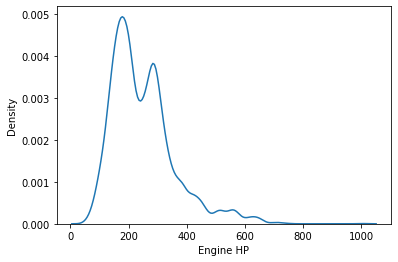

In [9]:
#Engine HP
#since Engine HP is a numeric column
#we can check distribution and fill columns from the graph

print(df['Engine HP'].mean())
print(df['Engine HP'].median())
print(df['Engine HP'].mode())
sns.kdeplot(df['Engine HP'])
#sns.boxplot(df['Engine HP'])

#I'm going to use median since the distribution is skewed and there are outliers so we cannot really use mean
#I would've probably used mode but !!! It just does'nt fell right to do so 🤔

df['Engine HP'].fillna(df['Engine HP'].median(), inplace = True)

#sns.kdeplot(df['Engine HP'])    #mehh looks roughly thesame idk

5.628828677213059
6.0
0    4.0
Name: Engine Cylinders, dtype: float64


C:\Users\Gift\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Gift\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Engine Cylinders'>

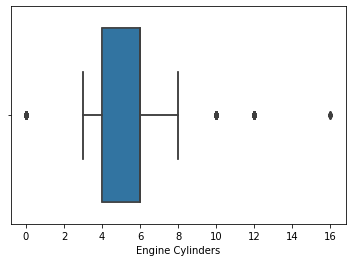

In [10]:
#Engine Cylinders
#using the same method sha

print(df['Engine Cylinders'].mean())
print(df['Engine Cylinders'].median())
print(df['Engine Cylinders'].mode())
sns.boxplot(df['Engine Cylinders'])

#im using mean.. dont ask why... 'cause I don't know (for now at least)
df['Engine Cylinders'].fillna(df['Engine Cylinders'].median(), inplace = True)

sns.boxplot(df['Engine Cylinders'])

In [11]:
#I dont care about the number of doors just use ffill
df['Number of Doors'].fillna(method='ffill', inplace = True)


In [12]:
#Market Category
#this is a categorical column
print(df['Market Category'].unique())
#print(df['Market Category'].value_counts())
# plt.figure(figsize=(10, 10))
# plt.xticks(rotation=-45)
# sns.barplot(x=df['Market Category'].unique()[:-1], y=df['Market Category'].value_counts())

['Factory Tuner,Luxury,High-Performance' 'Luxury,Performance'
 'Luxury,High-Performance' 'Luxury' 'Performance' 'Flex Fuel'
 'Flex Fuel,Performance' nan 'Hatchback' 'Hatchback,Luxury,Performance'
 'Hatchback,Luxury' 'Luxury,High-Performance,Hybrid' 'Diesel,Luxury'
 'Hatchback,Performance' 'Hatchback,Factory Tuner,Performance'
 'High-Performance' 'Factory Tuner,High-Performance'
 'Exotic,High-Performance' 'Exotic,Factory Tuner,High-Performance'
 'Factory Tuner,Performance' 'Crossover' 'Exotic,Luxury'
 'Exotic,Luxury,High-Performance' 'Exotic,Luxury,Performance'
 'Factory Tuner,Luxury,Performance' 'Flex Fuel,Luxury' 'Crossover,Luxury'
 'Hatchback,Factory Tuner,Luxury,Performance' 'Crossover,Hatchback'
 'Hybrid' 'Luxury,Performance,Hybrid'
 'Crossover,Luxury,Performance,Hybrid' 'Crossover,Luxury,Performance'
 'Exotic,Factory Tuner,Luxury,High-Performance'
 'Flex Fuel,Luxury,High-Performance' 'Crossover,Flex Fuel' 'Diesel'
 'Hatchback,Diesel' 'Crossover,Luxury,Diesel'
 'Crossover,Luxury,Hi

OKAY THE COLUMN LABELS WERE TOO MUCH (AND ALMOST OVERWHELMING) SO I DECIDED TO CREATE A MODEL TO PREDICT THEM 

In [13]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64